<a href="https://colab.research.google.com/github/peeka-boo0/ml-learning-journey/blob/main/notebooks/Day_5_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df = pd.read_csv('titanic_cleaned.csv')

# Convert categorical values
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Feature and label
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = df['survived']


In [ ]:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

tree_preds = tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_preds))


Decision Tree Accuracy: 0.7528089887640449


In [ ]:
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

forest_preds = forest_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, forest_preds))


Random Forest Accuracy: 0.7696629213483146


In [ ]:
print("\n--- Decision Tree ---")
print(classification_report(y_test, tree_preds))
print("\n--- Random Forest ---")
print(classification_report(y_test, forest_preds))



--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       109
           1       0.65      0.77      0.71        69

    accuracy                           0.75       178
   macro avg       0.74      0.76      0.75       178
weighted avg       0.76      0.75      0.76       178


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       109
           1       0.69      0.74      0.71        69

    accuracy                           0.77       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.77      0.77       178



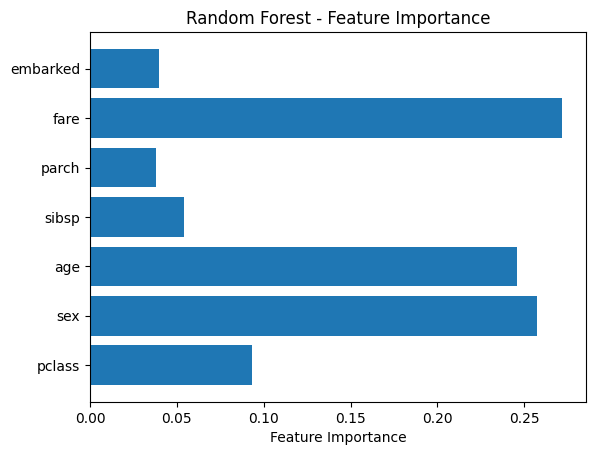

In [ ]:
import matplotlib.pyplot as plt

importances = forest_model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importance")
plt.show()
